In [10]:
import gymnasium as gym
from adaptive_time import value_est

import matplotlib.pyplot as plt
import pickle
import numpy as np

# import d3rlpy



In [11]:
seed = 3241

In [15]:
# n_steps_limit = 100_000  # 1000000

# env = gym.make('MountainCar-v0')
# eval_env = gym.make('MountainCar-v0')
# buffer = d3rlpy.dataset.create_fifo_replay_buffer(limit=n_steps_limit, env=env)
# cql = d3rlpy.algos.DiscreteCQLConfig().create()

# cql.fit_online(env, buffer, n_steps=n_steps_limit, eval_env=eval_env)


2024-03-08 19:21.02 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('int64')], shape=[()]) observation_signature=Signature(dtype=[dtype('float32')], shape=[(2,)]) reward_signature=Signature(dtype=[dtype('float32')], shape=[[1]])
2024-03-08 19:21.02 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.DISCRETE: 2>
2024-03-08 19:21.02 [info     ] Action size has been automatically determined. action_size=3
2024-03-08 19:21.02 [info     ] Directory is created at d3rlpy_logs/DiscreteCQL_online_20240308192102
2024-03-08 19:21.02 [debug    ] Building model...             
2024-03-08 19:21.02 [debug    ] Model has been built.         
2024-03-08 19:21.03 [info     ] Parameters                     params={'observation_shape': [2], 'action_size': 3, 'config': {'type': 'discrete_cql', 'params': {'batch_size': 32, 'gamma': 0.99, 'observation_scaler': {'type': 'none', 'params': {}}, 'action_scaler': {'type': 'none'

  0%|          | 0/100000 [00:00<?, ?it/s]

2024-03-08 19:21.18 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_online_20240308192102/model_10000.d3
2024-03-08 19:21.18 [info     ] DiscreteCQL_online_20240308192102: epoch=1 step=10000 epoch=1 metrics={'time_inference': 9.097466468811035e-05, 'time_environment_step': 1.7396044731140135e-05, 'time_step': 0.001488829255104065, 'time_sample_batch': 0.00040926219970421435, 'time_algorithm_update': 0.0009623694302648937, 'loss': 0.021394413747812244, 'td_loss': 0.004047725103055241, 'conservative_loss': 0.017346688665937752, 'rollout_return': -200.0, 'evaluation': -200.0} step=10000
2024-03-08 19:21.33 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_online_20240308192102/model_20000.d3
2024-03-08 19:21.33 [info     ] DiscreteCQL_online_20240308192102: epoch=2 step=20000 epoch=2 metrics={'time_inference': 9.418694972991943e-05, 'time_environment_step': 1.7815327644348143e-05, 'time_sample_batch': 0.00042609844207763673, 'time_algorithm_update': 0.000

## Train an agent

In [19]:
# import gym
# import matplotlib.pyplot as plt
# import numpy as np


# env_name = "MountainCar-v0"
# env = gym.make(env_name)
# #env.reset()
# #obs_, reward,done, _ = env.step(1)
# #print(obs_)
# #print(env.observation_space.high)
# #print(env.observation_space.low)

# Alpha = 0.19
# Gamma = 0.9999
# Eps = 1.0

# pos_chunk = np.linspace(env.observation_space.low[0], env.observation_space.high[0],30)
# vel_chunk = np.linspace(env.observation_space.low[1], env.observation_space.high[1], 30)

# def get_discrete_state(state):
#     pos_dis = np.digitize(state[0], pos_chunk)
#     vel_dis = np.digitize(state[1], vel_chunk)
#     return (pos_dis, vel_dis)

# def create_Q_table():
#     Q = {}
#     states = []

#     for i in range(len(pos_chunk)):
#         for j in range(len(vel_chunk)):
#             states.append((i,j))

#     for state in states:
#         for action in range(3):
#             Q[state,action] = 0

#     return Q

# def get_best_action(state,Q):
#     actions = np.array([Q[state,action] for action in range(3)])
#     best_action = np.argmax(actions)

#     return best_action

# def main(env,Alpha,Gamma,Eps,ep=50000):

#     max = -1000
#     good_episodes_values = {}

#     epsilon_decay = 1/ep
#     stock_rewards = np.zeros(ep+1)
#     Q = create_Q_table()


#     env._max_episode_steps = 1000

#     score = 0
#     for i in range(ep+1):
#         done = False
#         if i % 100 == 0:
#             print("episode : ", i, "score : ", score, "Epsilon :", Eps)

#         state, _ = env.reset()
#         #print(state.dtype)
#         state_dis = get_discrete_state(state)
#         score = 0

#         while not done:
#             if np.random.random() > Eps:
#                 action = get_best_action(state_dis,Q)
#             else:
#                 action = np.random.choice([0,1,2])
#             new_state, reward, done, truncated, info = env.step(action)
#             new_state_dis = get_discrete_state(new_state)
#             score += reward
#             new_action = get_best_action(new_state_dis, Q)
#             #print(Q[state_dis,action])
#             Q[state_dis, action] = Q[state_dis,action] + Alpha*(reward + Gamma*Q[new_state_dis, new_action] - Q[state_dis,action])
#             state_dis = new_state_dis
#         stock_rewards[i] = score

#         if score > max:
#           max = score
#         if score > -110:
#           good_episodes_values[i] = score


#         if Eps > 0.01:
#             Eps -= epsilon_decay
#         else:
#             Eps = 0.01
#     Visualize(ep,stock_rewards)
#     print("max : ", max)
#     print("good episodes", good_episodes_values)

#     env.close()
#     return Q

# def Visualize(ep,stock_rewards):
#     mean_r = np.zeros(ep-100)
#     for i in range(ep-100):
#         #print(i)
#         mean_r[i] = np.mean(stock_rewards[i:i+101])

#     plt.plot(mean_r)
#     plt.show()


# Q_function = main(env, Alpha,Gamma,Eps)

episode :  0 score :  0 Epsilon : 1.0
episode :  100 score :  -6434.0 Epsilon : 0.997999999999998
episode :  200 score :  -80131.0 Epsilon : 0.995999999999996
episode :  300 score :  -8317.0 Epsilon : 0.993999999999994


KeyboardInterrupt: 

## Generate trajectories

In [5]:


STEPS_MAX = 200

In [ ]:
env = gym.make('MountainCar-v0')


In [6]:
value_est.reset_randomness(seed, env)
value_est.generate_trajectory

reward_sequences = []
total_rewards = []
traj_lengths = []

trajectory, early_term = value_est.generate_trajectory(
        env, policy=lambda st, sn: 1,
        termination_prob=0.0, max_steps=STEPS_MAX)

traj_lengths.append(len(trajectory))
rewards = [r for _, _, r, _ in trajectory]

reward_sequences.append(rewards)
total_rewards.append(sum(rewards))


# with open(traj_data_path, "wb") as f:
#     pickle.dump(all_traj_data, f)
# print("Saved data to", traj_data_path)


print("total_rewards for each traj:", total_rewards)
if hasattr(reward_sequences, "shape"):
    print("all rewards shape if array:", reward_sequences.shape)
num_trajs = len(total_rewards)


total_rewards for each traj: [-201.0]


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-201.5, -201.4, -201.3, -201.2, -201.1, -201. , -200.9, -200.8,
        -200.7, -200.6, -200.5]),
 <BarContainer object of 10 artists>)

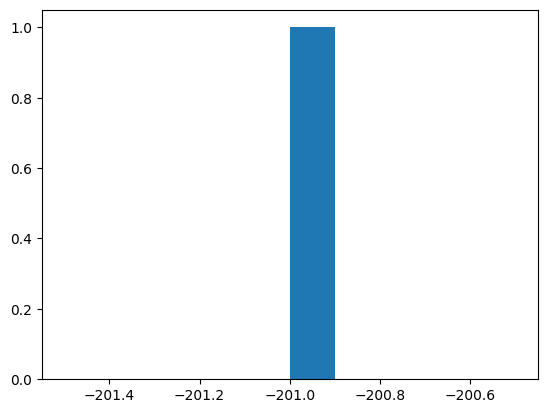

In [7]:
plt.hist(total_rewards)
# plt.savefig(f'{data_descr}_reward_total_distr.png')

-201.0


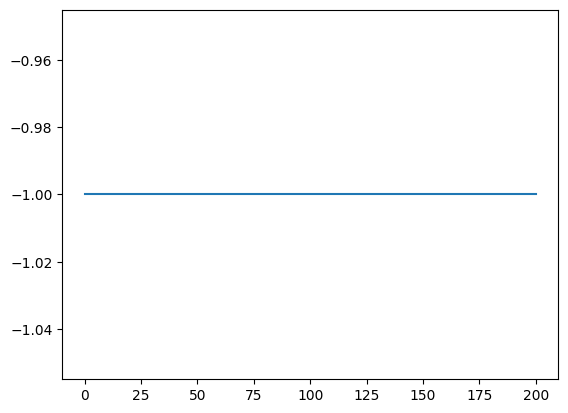

In [8]:

traj_idx = 0
print(total_rewards[traj_idx])
plt.plot(reward_sequences[traj_idx])
# plt.savefig(f'{data_descr}_reward_sample_curve.png')

In [9]:
import math
from importlib import reload
import os

import gc
import matplotlib.pyplot as plt
import pickle
import numpy as np

from tqdm.notebook import tqdm

from adaptive_time import plot_utils
from adaptive_time import utils
from adaptive_time import run_lib
from adaptive_time.environments import cartpole2
from adaptive_time import value_est
from adaptive_time.value_est import approx_integrators

from pprint import pprint

approx_integrators = reload(approx_integrators)
run_lib = reload(run_lib)
cartpole2 = reload(cartpole2)
value_est = reload(value_est)
plot_utils = reload(plot_utils)
utils = reload(utils)

/Users/szepi1991/Code/adaptive_time/.venv/lib/python3.11/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment CartPole-OURS-v2 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
